# Non-mainstream seats won in 2022

After the 2022 count was completed.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-set-up" data-toc-modified-id="Python-set-up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python set-up</a></span></li><li><span><a href="#Get-data" data-toc-modified-id="Get-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get data</a></span></li><li><span><a href="#Seats-won-by-party" data-toc-modified-id="Seats-won-by-party-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Seats won by party</a></span></li><li><span><a href="#The-Hypothetical-2PP-House-Result" data-toc-modified-id="The-Hypothetical-2PP-House-Result-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The Hypothetical 2PP House Result</a></span></li><li><span><a href="#The-crossbench" data-toc-modified-id="The-crossbench-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>The crossbench</a></span></li><li><span><a href="#Independent-won-seats" data-toc-modified-id="Independent-won-seats-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Independent won seats</a></span></li></ul></div>

## Python set-up

In [1]:
# data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

# local import 
import common

In [2]:
%load_ext watermark
%watermark -u -n -t -v -iv -w

Last updated: Sun Jun 26 2022 12:48:04

Python implementation: CPython
Python version       : 3.10.5
IPython version      : 8.4.0

numpy     : 1.23.0
matplotlib: 3.5.2
pandas    : 1.4.3

Watermark: 2.3.1



In [3]:
# plotting
plt.style.use('fivethirtyeight')

## Get data

In [4]:
houseTppByDivision = (
    pd.read_csv('https://tallyroom.aec.gov.au/Downloads/'
                'HouseTppByDivisionDownload-27966.txt',
                header=1, sep='\t',  skipinitialspace=True)
)
houseTppByDivision = (
    houseTppByDivision
    .set_index('DivisionNm', drop=True)
    .drop(columns=['DivisionID', 'PartyAb',
                   'Liberal/National Coalition Votes',
                   'Australian Labor Party Votes',
                   'TotalVotes'])
)
houseTppByDivision

,StateAb,Liberal/National Coalition Percentage,Australian Labor Party Percentage,Swing
DivisionNm,,,,
Adelaide,SA,38.09,61.91,-3.73
Aston,VIC,52.81,47.19,-7.32
Ballarat,VIC,37.03,62.97,-2.74
Banks,NSW,53.20,46.80,-3.06
Barker,SA,66.62,33.38,-2.32
...,...,...,...,...
Werriwa,NSW,44.18,55.82,-0.35
Whitlam,NSW,39.93,60.07,0.84
Wide Bay,QLD,61.34,38.66,-1.81


In [5]:
houseTcpByDivision = (
    pd.read_csv('https://tallyroom.aec.gov.au/Downloads/'
                'HouseTcpByCandidateByVoteTypeDownload-27966.csv',
                header=1, sep='[\t,]',  skipinitialspace=True)
)

# need to manipulate
houseTcpByDivision = houseTcpByDivision.pivot(index='DivisionNm', columns='PartyAb', values='TotalVotes')
houseTcpByDivision = houseTcpByDivision.div(houseTcpByDivision.sum(axis=1), axis=0) * 100
coalition = ['CLP', 'LNP', 'LP', 'NP']
houseTcpByDivision['Coalition'] = houseTcpByDivision[coalition].sum(axis=1).replace({0: np.nan})
houseTcpByDivision = houseTcpByDivision.drop(columns=coalition)

/var/folders/96/8bhlz_x975z93glbxq_2_yqr0000gn/T/ipykernel_53312/2992111827.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  pd.read_csv('https://tallyroom.aec.gov.au/Downloads/'


In [6]:
houseTcpByDivision

PartyAb,ALP,GRN,IND,KAP,XEN,Coalition
DivisionNm,,,,,,
Adelaide,61.913377,NaN,NaN,NaN,NaN,38.086623
Aston,47.188264,NaN,NaN,NaN,NaN,52.811736
Ballarat,62.974093,NaN,NaN,NaN,NaN,37.025907
Banks,46.798848,NaN,NaN,NaN,NaN,53.201152
Barker,33.380278,NaN,NaN,NaN,NaN,66.619722
...,...,...,...,...,...,...
Werriwa,55.820771,NaN,NaN,NaN,NaN,44.179229
Whitlam,60.073900,NaN,NaN,NaN,NaN,39.926100
Wide Bay,38.656050,NaN,NaN,NaN,NaN,61.343950


## Seats won by party

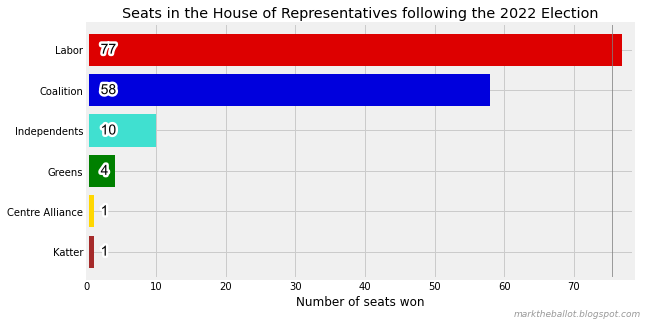

In [7]:
ALL_SEATS = 151
palette = {
    'ALP': ['Labor', '#dd0000'],
    'GRN': ['Greens', 'green'],
    'IND': ['Independents', 'turquoise'],
    'KAP': ['Katter', 'brown'],
    'XEN': ['Centre Alliance', 'gold'],
    'Coalition': ['Coalition', '#0000dd']
}
p2 = {a: b for a,b in palette.values()}
seats_won = (
    (houseTcpByDivision > 50)
    .sum()
    .rename(index={a:b[0] for a,b in palette.items()})
    .sort_values()
)
assert seats_won.sum() == ALL_SEATS # check it all adds up.

fig, ax = common.initiate_plot()
seats_won.plot.barh(ax=ax, width=0.8, 
                    color=[p2[x] for x in seats_won.index])
for i, value in enumerate(seats_won):
    text = ax.text(2, i, f'{value}', ha='left', va='center', size=14,
                  fontname='Arial')
    text.set_path_effects([pe.withStroke(linewidth=5, foreground='w')])
ax.axvline(ALL_SEATS/2.0, lw=0.75, c='gray')
common.plot_finalise(
    ax=ax,
    title='Seats in the House of Representatives following the 2022 Election',
    ylabel=None,
    xlabel='Number of seats won',
)

## The Hypothetical 2PP House Result

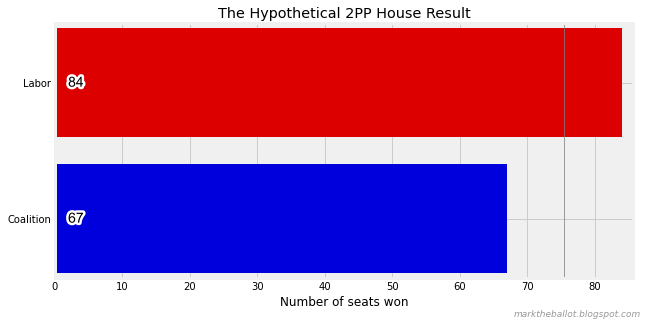

In [8]:
labor = (houseTppByDivision['Australian Labor Party Percentage'] > 50).sum()
coalition = (houseTppByDivision['Liberal/National Coalition Percentage'] > 50).sum()
items = {
    'Coalition': coalition,
    'Labor': labor,
}

fig, ax = common.initiate_plot()
for label, result in items.items():
    ax.barh(label, result, 
            color='#dd0000' if label == 'Labor' else '#0000dd')
    text = ax.text(2, label, f'{result}', ha='left', va='center', size=14,
                  fontname='Arial')
    text.set_path_effects([pe.withStroke(linewidth=5, foreground='w')])
ax.axvline(ALL_SEATS/2.0, lw=0.75, c='gray')
common.plot_finalise(
    ax=ax,
    title='The Hypothetical 2PP House Result',
    ylabel=None,
    xlabel='Number of seats won',
)

## The crossbench

In [9]:
cb_seats = (
    houseTcpByDivision
    .fillna(0)
    .pipe(lambda x: x[(x.ALP < 50) & (x.Coalition < 50)])
    .index
)
cb_seats, len(cb_seats)

(Index(['Brisbane', 'Clark', 'Curtin', 'Fowler', 'Goldstein', 'Griffith',
        'Indi', 'Kennedy', 'Kooyong', 'Mackellar', 'Mayo', 'Melbourne',
        'North Sydney', 'Ryan', 'Warringah', 'Wentworth'],
       dtype='object', name='DivisionNm'),
 16)

In [10]:
# Notional TPP wins in those seats
cols = ['Liberal/National Coalition Percentage',
        'Australian Labor Party Percentage']
cb_tpp = houseTppByDivision.loc[cb_seats, cols]
(cb_tpp > 50).sum()

Liberal/National Coalition Percentage    9
Australian Labor Party Percentage        7
dtype: int64

In [18]:
frame = {
    'From Labor': 'Australian Labor Party Percentage',
    'From Coalition': 'Liberal/National Coalition Percentage',
}
for from_, col in frame.items():
    print(from_)
    index = cb_tpp[cb_tpp[col] > 50].index
    print(houseTppByDivision.loc[index].sort_values(col).to_html())
    print('=' * 50)

# Brisbane, Mayo and Ryan are all surprises here. 
# Fowler is also very interesting here

From Labor
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>StateAb</th>
      <th>Liberal/National Coalition Percentage</th>
      <th>Australian Labor Party Percentage</th>
      <th>Swing</th>
    </tr>
    <tr>
      <th>DivisionNm</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Mayo</th>
      <td>SA</td>
      <td>48.41</td>
      <td>51.59</td>
      <td>-4.13</td>
    </tr>
    <tr>
      <th>Ryan</th>
      <td>QLD</td>
      <td>47.58</td>
      <td>52.42</td>
      <td>-8.45</td>
    </tr>
    <tr>
      <th>Brisbane</th>
      <td>QLD</td>
      <td>45.60</td>
      <td>54.40</td>
      <td>-9.32</td>
    </tr>
    <tr>
      <th>Fowler</th>
      <td>NSW</td>
      <td>44.28</td>
      <td>55.72</td>
      <td>8.27</td>
    </tr>
    <tr>
      <th>Griffith</th>
      <td>QLD</td>
      <td>38.93</td>
      <td>61.07</td>
      <td>-8.21</td>
 

## Independent won seats

In [12]:
# Identify the seats won by independents
i_seats = houseTcpByDivision[houseTcpByDivision['IND'].notna()
                             & (houseTcpByDivision['IND'] > 50.0)].index
len(i_seats), i_seats

(10,
 Index(['Clark', 'Curtin', 'Fowler', 'Goldstein', 'Indi', 'Kooyong',
        'Mackellar', 'North Sydney', 'Warringah', 'Wentworth'],
       dtype='object', name='DivisionNm'))

In [13]:
houseTcpByDivision.loc[i_seats].dropna(how='all', axis=1)

PartyAb,ALP,IND,Coalition
DivisionNm,,,
Clark,29.177163,70.822837,NaN
Curtin,NaN,51.264792,48.735208
Fowler,48.374329,51.625671,NaN
Goldstein,NaN,52.872450,47.127550
Indi,NaN,58.939191,41.060809
Kooyong,NaN,52.943414,47.056586
Mackellar,NaN,52.502753,47.497247
North Sydney,NaN,52.917070,47.082930
Warringah,NaN,60.955279,39.044721


In [14]:
# TPP imn the seats won by independents
cols = ['Liberal/National Coalition Percentage',
        'Australian Labor Party Percentage']
won = houseTppByDivision.loc[i_seats, cols]
won.style.applymap(lambda x: f"background-color: {'gold' if x >= 50 else 'white'}")

,Liberal/National Coalition Percentage,Australian Labor Party Percentage
DivisionNm,,
Clark,32.760000,67.240000
Curtin,55.600000,44.400000
Fowler,44.280000,55.720000
Goldstein,54.800000,45.200000
Indi,55.260000,44.740000
Kooyong,54.180000,45.820000
Mackellar,58.600000,41.400000
North Sydney,51.260000,48.740000
Warringah,51.430000,48.570000
